## Importing Libraries + Reading Data

In [64]:
# Importing pre-requisite libraries

import pandas as pd # For dealing with dataframes (i.e. pd.read_csv())
import matplotlib.pyplot as plt # Displaying graphs 
from sklearn.model_selection import train_test_split # Seperating the training and testing process
from sklearn.impute import SimpleImputer # For replacing missing values
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # Easier preprocessing
from sklearn.ensemble import RandomForestRegressor # Will be used for the model
from sklearn.preprocessing import OrdinalEncoder # For dealing with categorical values
from sklearn.metrics import mean_absolute_error # MAE for model accuracy determination
from xgboost import XGBRegressor # Alternative model


In [2]:
# Reading the contents
file_path = r'C:\Users\Khalid\Desktop\ML Projects\Beginner\World Happiness\World-happiness-report-2024.csv'

data = pd.read_csv(file_path)

## EDA 

In [3]:
data.shape # Checking the number of rows and columns within the dataframe

(143, 12)

In [4]:
data.info() # Information about the given data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [5]:
data.isnull().sum() # Summing up the number of null value in the .csv file

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [6]:
# Checking the first few pieces of data
data.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [7]:
data.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [8]:
data['Country name'].unique() # Number of countries in the dataset

array(['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
       'Norway', 'Luxembourg', 'Switzerland', 'Australia', 'New Zealand',
       'Costa Rica', 'Kuwait', 'Austria', 'Canada', 'Belgium', 'Ireland',
       'Czechia', 'Lithuania', 'United Kingdom', 'Slovenia',
       'United Arab Emirates', 'United States', 'Germany', 'Mexico',
       'Uruguay', 'France', 'Saudi Arabia', 'Kosovo', 'Singapore',
       'Taiwan Province of China', 'Romania', 'El Salvador', 'Estonia',
       'Poland', 'Spain', 'Serbia', 'Chile', 'Panama', 'Malta', 'Italy',
       'Guatemala', 'Nicaragua', 'Brazil', 'Slovakia', 'Latvia',
       'Uzbekistan', 'Argentina', 'Kazakhstan', 'Cyprus', 'Japan',
       'South Korea', 'Philippines', 'Vietnam', 'Portugal', 'Hungary',
       'Paraguay', 'Thailand', 'Malaysia', 'China', 'Honduras', 'Bahrain',
       'Croatia', 'Greece', 'Bosnia and Herzegovina', 'Libya', 'Jamaica',
       'Peru', 'Dominican Republic', 'Mauritius', 'Moldova', 'Russia',
       'Boli

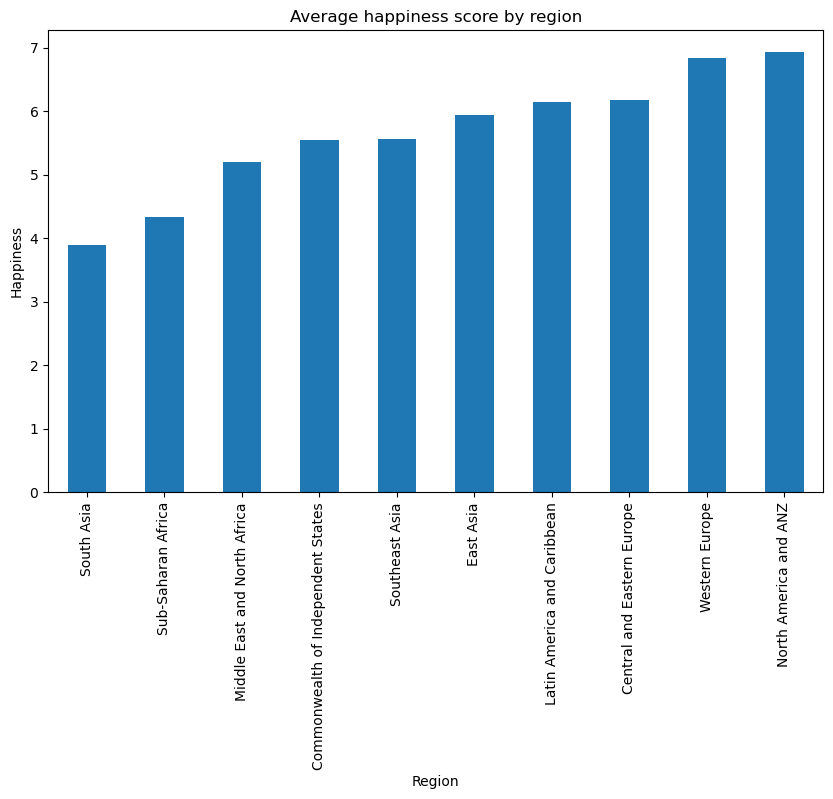

In [9]:
# Plotting data for average happiness per region

region_avg = data.groupby('Regional indicator')['Ladder score'].mean().sort_values()
plt.figure(figsize=(10,6))
region_avg.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Happiness')
plt.title('Average happiness score by region')
plt.show()

##### As from visualizing the data, from the years 2005-2024, it is clear that the regions of Asia and Africa are the least happiest, whereas places in the West such as Europe and America are the happiest.



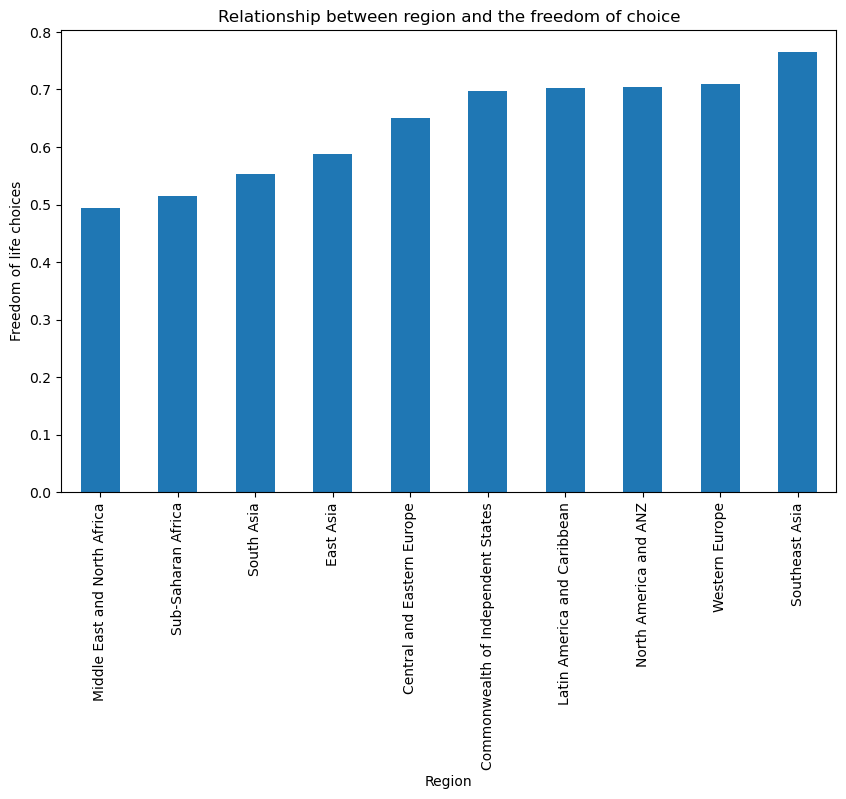

In [10]:
# Plotting data for region and freedom of life choices

region_avg = data.groupby('Regional indicator')['Freedom to make life choices'].mean().sort_values()
plt.figure(figsize=(10,6))
region_avg.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Freedom of life choices')
plt.title('Relationship between region and the freedom of choice')
plt.show()